[View in Colaboratory](https://colab.research.google.com/github/jotadram6/Colaboratory-HEP/blob/master/GettingROOT.ipynb)

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
binutils is already the newest version (2.29.1-4ubuntu1).
cmake is already the newest version (3.9.1-1).
dpkg-dev is already the newest version (1.18.24ubuntu1).
g++ is already the newest version (4:7.2.0-1ubuntu1).
gcc is already the newest version (4:7.2.0-1ubuntu1).
libx11-dev is already the newest version (2:1.6.4-3).
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
tar is already the newest version (1.29b-2).
git is already the newest version (1:2.14.1-1ubuntu4.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


### 2. Download a binary root that compiled in google drive "colaboratory" environement

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.tar' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title root_build_google_yikes.tar, id 17yZRY6neXMaHVjlRHIotS-PIyZo2k5BZ


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = file['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("root_build_google_yikes.tar")
#DownloadedFile=downloaded.GetContentString()
#print(DownloadedFile)
#print('Downloaded content "{}"'.format(downloaded.GetContentString(),format_spec='b'))

In [4]:
!ls -ltrh

total 3.0G
drwxr-xr-x  2 root root 4.0K Sep 20 00:09 sample_data
drwxr-xr-x 44 root root 4.0K Sep 20 23:35 root_build
-rw-r--r--  1 root root 2.5K Sep 21 14:08 adc.json
-rw-r--r--  1 root root 7.6K Sep 21 16:02 py-fillrandom.root
-rw-r--r--  1 root root 3.0G Sep 21 16:18 root_build_google_yikes.tar


In [5]:
!tar -xvf root_build_google_yikes.tar

root_build/
root_build/share/
root_build/share/man/
root_build/share/man/man1/
root_build/share/man/man1/lzcat.1
root_build/share/man/man1/xzegrep.1
root_build/share/man/man1/pcregrep.1
root_build/share/man/man1/xzless.1
root_build/share/man/man1/lzmore.1
root_build/share/man/man1/pcretest.1
root_build/share/man/man1/pcre-config.1
root_build/share/man/man1/lzmadec.1
root_build/share/man/man1/lzmainfo.1
root_build/share/man/man1/lzgrep.1
root_build/share/man/man1/unlzma.1
root_build/share/man/man1/unxz.1
root_build/share/man/man1/xzcmp.1
root_build/share/man/man1/xzfgrep.1
root_build/share/man/man1/lzless.1
root_build/share/man/man1/lzma.1
root_build/share/man/man1/xzmore.1
root_build/share/man/man1/lzdiff.1
root_build/share/man/man1/xzdiff.1
root_build/share/man/man1/xzdec.1
root_build/share/man/man1/xz.1
root_build/share/man/man1/lzegrep.1
root_build/share/man/man1/xzcat.1
root_build/share/man/man1/lzcmp.1
root_build/share/man/man1/lzfgrep.1
root_build/share/man/man1/xzgrep.1
root_bui


### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
import ROOT

Welcome to JupyROOT 6.14/04


# We made it!!! :)

### 4. Finally, test ROOT installation with a simple example

In [8]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile
from ROOT import gROOT, gBenchmark
c1 = TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
pad1 = TPad( 'pad1', 'The pad with the function',  0.05, 0.50, 0.95, 0.95, 21 )
pad2 = TPad( 'pad2', 'The pad with the histogram', 0.05, 0.05, 0.95, 0.45, 21 )
pad1.Draw()
pad2.Draw()
pad1.cd()
gBenchmark.Start( 'fillrandom' )
#
# A function (any dimension) or a formula may reference
# an already defined formula
#
form1 = TFormula( 'form1', 'abs(sin(x)/x)' )
sqroot = TF1( 'sqroot', 'x*gaus(0) + [3]*form1', 0, 10 )
sqroot.SetParameters( 10, 4, 1, 20 )
pad1.SetGridx()
pad1.SetGridy()
pad1.GetFrame().SetFillColor( 42 )
pad1.GetFrame().SetBorderMode( -1 )
pad1.GetFrame().SetBorderSize( 5 )
sqroot.SetLineColor( 4 )
sqroot.SetLineWidth( 6 )
sqroot.Draw()
lfunction = TPaveLabel( 5, 39, 9.8, 46, 'The sqroot function' )
lfunction.SetFillColor( 41 )
lfunction.Draw()
c1.Update()
#
# Create a one dimensional histogram (one float per bin)
# and fill it following the distribution in function sqroot.
#
pad2.cd();
pad2.GetFrame().SetFillColor( 42 )
pad2.GetFrame().SetBorderMode( -1 )
pad2.GetFrame().SetBorderSize( 5 )
h1f = TH1F( 'h1f', 'Test random numbers', 200, 0, 10 )
h1f.SetFillColor( 45 )
h1f.FillRandom( 'sqroot', 10000 )
h1f.Draw()
c1.Update()
#
# Open a ROOT file and save the formula, function and histogram
#
myfile = TFile( 'py-fillrandom.root', 'RECREATE' )
form1.Write()
sqroot.Write()
h1f.Write()
myfile.Close()
gBenchmark.Show( 'fillrandom' )

fillrandom: Real Time =   0.20 seconds Cpu Time =   0.18 seconds


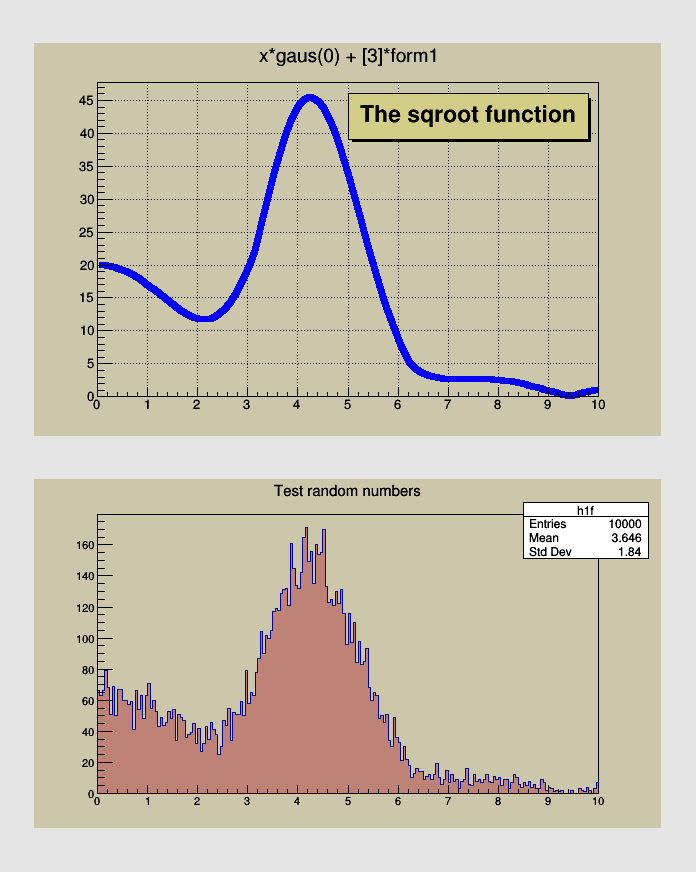

In [9]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()